In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_pickle("data/df_raw.pkl")

In [3]:
df.head()

enrollee_id      city  city_development_index gender  \
0        23798  city_149                   0.689   Male   
1        29166   city_83                   0.923   Male   
2           46   city_16                   0.910    NaN   
3        18527   city_64                   0.666   Male   
4        21751  city_100                   0.887    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM          3      100-500         Pvt Ltd            1   
1             STEM         14          <10  Funded Startup            1   
2             STEM          6        50-99   Public Sector            2   
3             STEM         14        50-99         Pvt Ltd            1   
4             STEM          8          NaN             NaN            2   

   training_hours  target  
0             106       0  
1              69       0  
2               4       0  
3              26       0  
4              88       1

In [4]:
df.target.unique()

array([0, 1])

In [5]:
"There are {}, or {}%, people looking for a new job, while {}, or {}% are not. In total participans {}.".format(df[df["target"]==1].count()[0], round((df[df["target"]==1].count()[0]/df.shape[0])*100,2), df[df["target"]==0].count()[0], round((df[df["target"]==0].count()[0]/df.shape[0])*100,2), df["enrollee_id"].unique().shape[0])

'There are 2425, or 7.26%, people looking for a new job, while 30955, or 92.74% are not. In total participans 33380.'

In [33]:
df["target_new"] = df["target"]
df['target_new'] = df['target_new'].replace(1,"looking")
df['target_new'] = df['target_new'].replace(0,"not_looking")

In [34]:
df.head()

enrollee_id      city  city_development_index gender  \
0        23798  city_149                   0.689   Male   
1        29166   city_83                   0.923   Male   
2           46   city_16                   0.910    NaN   
3        18527   city_64                   0.666   Male   
4        21751  city_100                   0.887    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM          3      100-500         Pvt Ltd            1   
1             STEM         14          <10  Funded Startup            1   
2             STEM          6        50-99   Public Sector            2   
3             STEM         14        50-99         Pvt Ltd            1   
4             STEM          8          NaN             NaN            2   

   training_hours  target   target_new  
0             106       0  not_looking  
1              69       0  not_looking  
2               4       0  not_looking  
3              26       0  not_looking  
4              88       1      looking

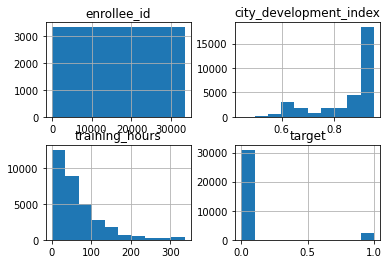

In [35]:
# Experience

df.hist();

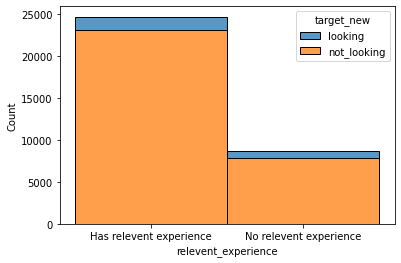

In [82]:
sns_rel_exp = sns.histplot(data=df, x="relevent_experience", hue="target_new", hue_order=["looking", "not_looking"],  multiple="stack")
fig = sns_rel_exp.get_figure()
fig.savefig("blog/relevant_experience.png")

In [83]:
df["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [85]:
df_w_rel_exp=df[df["relevent_experience"]=='Has relevent experience']
(df_w_rel_exp.groupby("target").count()["enrollee_id"] / df_w_rel_exp.shape[0])*100

target
0    93.546036
1     6.453964
Name: enrollee_id, dtype: float64

In [87]:
df_w_no_rel_exp=df[df["relevent_experience"]=='No relevent experience']
(df_w_no_rel_exp.groupby("target").count()["enrollee_id"] / df_w_no_rel_exp.shape[0])*100

target
0    90.428473
1     9.571527
Name: enrollee_id, dtype: float64

In [41]:
cols_fill_mode = ["enrolled_university", "education_level", "experience", "last_new_job"]

for col in cols_fill_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [42]:
df['experience'] = df['experience'].replace("<1","0")
df['experience'] = df['experience'].replace(">20","21")
df['experience'] = df['experience'].astype(int)

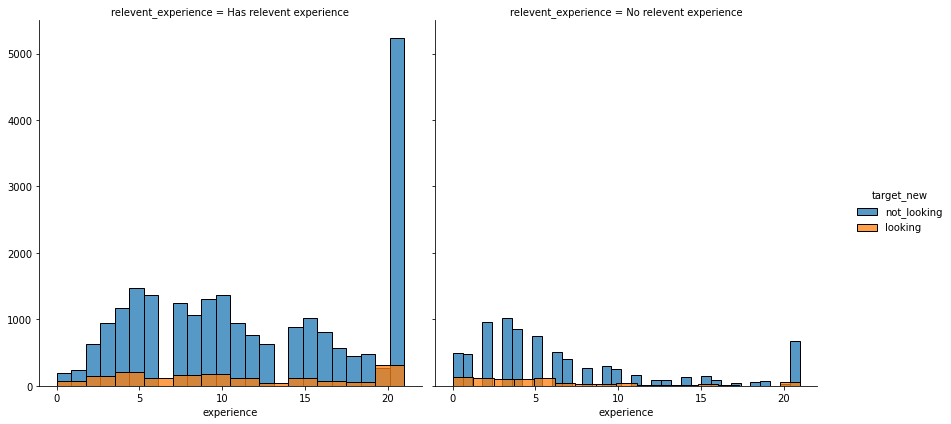

In [126]:
g = sns.FacetGrid(df, col="relevent_experience",hue="target_new", margin_titles=True, height=6)
g.map(sns.histplot, "experience")
g.add_legend()
g.savefig("blog/experience_relevant_experience.png")

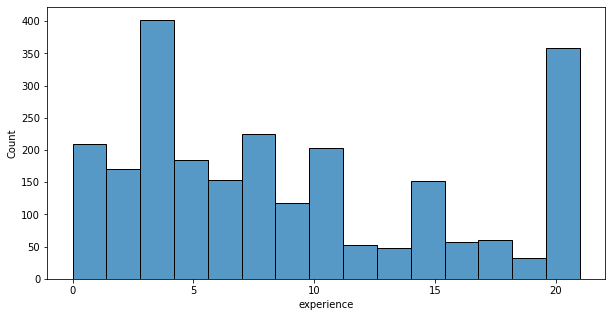

In [127]:
figures, axes = plt.subplots(figsize=(10, 5))
sns_exp = sns.histplot(df[df["target"]==1], x="experience"); #, hue_order=["looking", "not_looking"]);
fig_exp = sns_exp.get_figure()
fig.savefig("blog/experience_target1.png")

In [112]:
df_exp_3 = df[df["experience"] >=3]
(df_exp_3.groupby("target").count()["enrollee_id"] / df.shape[0])*100

target
0    83.819652
1     6.126423
Name: enrollee_id, dtype: float64

In [113]:
df_exp_less_3 = df[df["experience"] < 3]
(df_exp_less_3.groupby("target").count()["enrollee_id"] / df.shape[0])*100

target
0    8.915518
1    1.138406
Name: enrollee_id, dtype: float64

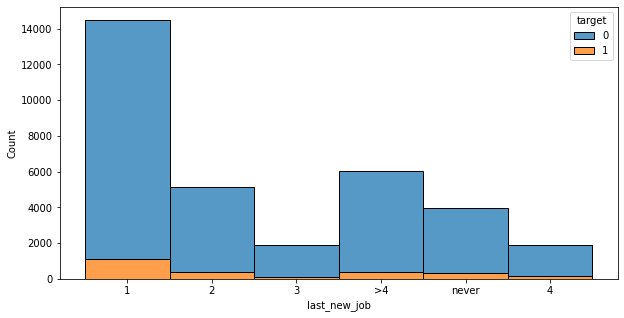

In [89]:
figures, axes = plt.subplots(figsize=(10, 5))
sns.histplot(df, x="last_new_job", hue="target", multiple="stack");

In [60]:
groupby_exp = df.groupby(["relevent_experience","experience"]).count()["enrollee_id"]
experience_frame = pd.DataFrame(groupby_exp)
experience_frame.columns = ["count"]
experience_frame["%"] = round((experience_frame["count"] / df.shape[0])*100,1)
experience_frame

count     %
relevent_experience     experience             
Has relevent experience 0             225   0.7
                        1             271   0.8
                        2             684   2.0
                        3            1044   3.1
                        4            1286   3.9
                        5            1572   4.7
                        6            1486   4.5
                        7            1344   4.0
                        8            1136   3.4
                        9            1386   4.2
                        10           1459   4.4
                        11           1019   3.1
                        12            811   2.4
                        13            676   2.0
                        14            939   2.8
                        15           1087   3.3
                        16            862   2.6
                        17            604   1.8
                        18            475   1.4
                        19            514   1.5
                        20            286   0.9
                        21           5532  16.6
No relevent experience  0             557   1.7
                        1             547   1.6
                        2            1072   3.2
                        3            1122   3.4
                        4             954   2.9
                        5             828   2.5
                        6             553   1.7
                        7             435   1.3
                        8             287   0.9
                        9             336   1.0
                        10            294   0.9
                        11            171   0.5
                        12             94   0.3
                        13             87   0.3
                        14            141   0.4
                        15            157   0.5
                        16            102   0.3
                        17             55   0.2
                        18             58   0.2
                        19             76   0.2
                        20             35   0.1
                        21            721   2.2

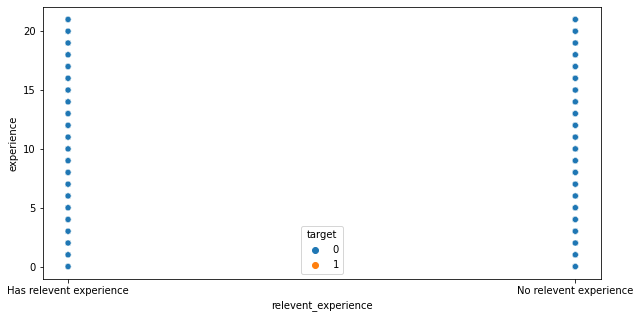

In [16]:
figures, axes = plt.subplots(figsize=(10, 5))
sns.scatterplot("relevent_experience", "experience", data=df, hue="target", hue_order=[0,1], ax=axes);

In [48]:
plt.figure(figsize=(9, 5))
plot_bar_graph('experience', order=order)
plt.show()

NameError: name 'plot_bar_graph' is not defined